In [147]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 

In [148]:
#giving the Beta distribution here 
alpha, beta = 0.5, 0.5
bandwidth  = 0.07
# Generate 10,000 random samples from Beta distribution
# samples = np.random.beta(alpha, beta, 10000)
x = np.linspace(0,10,1000)
y = np.linspace(0.2,0.6,1000)
z = np.linspace(0.8,1,1000)
samples = [x,y,z]

In [149]:
def gaussian(u):
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * u**2)

def epan(u):
    return 0.75 * (1 - u**2) * (np.abs(u) <= 1)
# 1D KDE estimator
def kde_1d(X, x_points, h):
    """
    X:         array-like, sample data (1D)
    x_points:  array-like, where to evaluate the density
    h:         scalar, bandwidth (smoothing parameter)
    
    Returns:
    density:   array-like, KDE values at each point in x_points
    """
    n = len(X)
    density = np.zeros_like(x_points, dtype=float)
    
    for i, x in enumerate(x_points):
        u = (x - X) / h
        kernels = epan(u)
        density[i] = np.sum(kernels) / (n * h)
    
    return density

grid = np.linspace(0,1,100)
density = kde_1d(samples, grid,bandwidth)

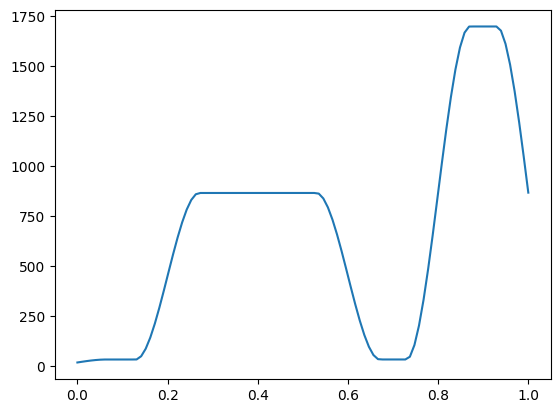

In [150]:
plt.figure()
plt.plot(grid, density)